In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv('play.csv')
df.head()

,DAY,Outlook,Temperature,Humidity,Wind,PlayTennis
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cold,Normal,Weak,Yes


#use ID3 Algorithm 

In [24]:
# use ID3 Algorithm 

x=df.iloc[:,1:-1].values

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# x[:,3]=le.fit_transform(x[:,3])

x[:,0] = le.fit_transform(x[:,3])
x[:,1] = le.fit_transform(x[:,3])
x[:,2] = le.fit_transform(x[:,3])
x[:,3] = le.fit_transform(x[:,3])
x

array([[1, 1, 1, 1],
       [0, 0, 0, 0],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [1, 1, 1, 1],
       [0, 0, 0, 0]], dtype=object)

In [25]:
y=df.iloc[:,-1].values
y

array(['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'No'], dtype=object)

In [26]:
y = le.fit_transform(y)
y

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
x_train

array([[0, 0, 0, 0],
       [1, 1, 1, 1],
       [0, 0, 0, 0],
       [1, 1, 1, 1],
       [0, 0, 0, 0],
       [1, 1, 1, 1],
       [0, 0, 0, 0],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [0, 0, 0, 0],
       [1, 1, 1, 1]], dtype=object)

In [28]:
y_train

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1])

In [29]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)
x_train

array([[-1.09544512, -1.09544512, -1.09544512, -1.09544512],
       [ 0.91287093,  0.91287093,  0.91287093,  0.91287093],
       [-1.09544512, -1.09544512, -1.09544512, -1.09544512],
       [ 0.91287093,  0.91287093,  0.91287093,  0.91287093],
       [-1.09544512, -1.09544512, -1.09544512, -1.09544512],
       [ 0.91287093,  0.91287093,  0.91287093,  0.91287093],
       [-1.09544512, -1.09544512, -1.09544512, -1.09544512],
       [ 0.91287093,  0.91287093,  0.91287093,  0.91287093],
       [ 0.91287093,  0.91287093,  0.91287093,  0.91287093],
       [-1.09544512, -1.09544512, -1.09544512, -1.09544512],
       [ 0.91287093,  0.91287093,  0.91287093,  0.91287093]])

In [30]:
from sklearn.decomposition import PCA as p
ppp = p(n_components=2)
x_train = ppp.fit_transform(x_train)
x_test = ppp.transform(x_test)
x_train

array([[ 2.19089023e+00,  5.50854919e-16],
       [-1.82574186e+00,  8.54161322e-17],
       [ 2.19089023e+00, -3.09435646e-17],
       [-1.82574186e+00,  8.54161322e-17],
       [ 2.19089023e+00, -3.09435646e-17],
       [-1.82574186e+00,  8.54161322e-17],
       [ 2.19089023e+00, -3.09435646e-17],
       [-1.82574186e+00,  8.54161322e-17],
       [-1.82574186e+00,  8.54161322e-17],
       [ 2.19089023e+00, -3.09435646e-17],
       [-1.82574186e+00,  8.54161322e-17]])

In [31]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy',random_state=0)
dt.fit(x_train,y_train)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [32]:
y_pred = dt.predict(x_test)
y_pred

array([1, 0, 1])

In [33]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[0, 0],
       [1, 2]], dtype=int64)

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.67      0.80         3

    accuracy                           0.67         3
   macro avg       0.50      0.33      0.40         3
weighted avg       1.00      0.67      0.80         3



C:\Users\HP\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [35]:
y_test

array([1, 1, 1])

In [36]:
y_pred

array([1, 0, 1])

## 4. Data set given in the table is for a company produce tissues (used by biological labs). Company objective is to predict how well their products are accepted by the clients. They conducted a survey with their clients to find the acceptance levels of the products. As shown in figure, Type- 1 and 2 are not well accepted whereas Type- 3 and4 are well accepted.

In [37]:
X=np.array( [[7,7],
    [7,4],
    [3,4],
    [1,4]])
X
y=np.array([0,0,1,1])
y

array([0, 0, 1, 1])

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.5,random_state =0)

In [39]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
x_train=s.fit_transform(x_train)
x_test = s.transform(x_test)
x_train

array([[ 0., -1.],
       [ 0.,  1.]])

In [40]:
#Built a classifier to find the class for the following new type with K=3:
#from sklearn.neighbors import KNeighborsClassifier



In [41]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [42]:
y_pred = knn.predict(np.array(x_test))
y_pred

array([0, 0])

In [43]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[0, 0],
       [2, 0]], dtype=int64)

## 5. Apply the naive Bayes classifier to a concept learning problem to classify days according to whether someone will play tennis. The table given below provides a set of 14 training examples of the target concept PlayTennis,where each day is described by the attributes Outlook, Temperature, Humidity, and Wind.

In [44]:
df = pd.read_csv("play.csv")
df


,DAY,Outlook,Temperature,Humidity,Wind,PlayTennis
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cold,Normal,Weak,Yes
5,D6,Rain,Cold,Normal,Strong,No
6,D7,Overcast,Cold,Normal,Strong,Yes
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cold,Normal,Weak,Yes
9,D10,Rain,Mild,Normal,Weak,Yes


In [45]:
x=df.iloc[:,1:-1].values
print(x)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# x[:,3]=le.fit_transform(x[:,3])

x[:,0] = le.fit_transform(x[:,0])
x[:,1] = le.fit_transform(x[:,1])
x[:,2] = le.fit_transform(x[:,2])
x[:,3] = le.fit_transform(x[:,3])
x


[['Sunny' 'Hot' 'High' 'Weak']
 ['Sunny' 'Hot' 'High' 'Strong']
 ['Overcast' 'Hot' 'High' 'Weak']
 ['Rain' 'Mild' 'High' 'Weak']
 ['Rain' 'Cold' 'Normal' 'Weak']
 ['Rain' 'Cold' 'Normal' 'Strong']
 ['Overcast' 'Cold' 'Normal' 'Strong']
 ['Sunny' 'Mild' 'High' 'Weak']
 ['Sunny' 'Cold' 'Normal' 'Weak']
 ['Rain' 'Mild' 'Normal' 'Weak']
 ['Sunny' 'Mild' 'Normal' 'Strong']
 ['Overcast' 'Mild' 'High' 'Strong']
 ['Overcast' 'Hot' 'Normal' 'Weak']
 ['Rain' 'Mild' 'High' 'Strong']]


array([[2, 1, 0, 1],
       [2, 1, 0, 0],
       [0, 1, 0, 1],
       [1, 2, 0, 1],
       [1, 0, 1, 1],
       [1, 0, 1, 0],
       [0, 0, 1, 0],
       [2, 2, 0, 1],
       [2, 0, 1, 1],
       [1, 2, 1, 1],
       [2, 2, 1, 0],
       [0, 2, 0, 0],
       [0, 1, 1, 1],
       [1, 2, 0, 0]], dtype=object)

In [46]:
y=df.iloc[:,5].values
le1 = LabelEncoder()
y=le1.fit_transform(y)
y

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

In [47]:
to_pred = [[2,0,0,0]]
x = np.append(x,to_pred).reshape(15,4)
x

array([[2, 1, 0, 1],
       [2, 1, 0, 0],
       [0, 1, 0, 1],
       [1, 2, 0, 1],
       [1, 0, 1, 1],
       [1, 0, 1, 0],
       [0, 0, 1, 0],
       [2, 2, 0, 1],
       [2, 0, 1, 1],
       [1, 2, 1, 1],
       [2, 2, 1, 0],
       [0, 2, 0, 0],
       [0, 1, 1, 1],
       [1, 2, 0, 0],
       [2, 0, 0, 0]], dtype=object)

In [48]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)
x_train

array([[ 0., -1.],
       [ 0.,  1.]])

In [49]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x[:-1,:],y,test_size=0.2,random_state=0)


In [50]:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [51]:
y_pred_example = classifier.predict([x[-1,:]]) #sunny,cool,high,strong
#y_pred = classifier.predict(x_test)
y_pred_example

array([0])

## 6. Develop a Decision Tree for the given data set and find the accuracy of the model.

In [52]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [53]:
x = df.iloc[:,[2,3]].values


In [54]:
y = df.iloc[:,-1].values
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


In [55]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


In [56]:

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)


In [57]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy',random_state=0)
dt.fit(x_train,y_train)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [58]:
y_pred = dt.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

In [59]:
from sklearn.metrics import accuracy_score
cm = accuracy_score(y_test,y_pred)
cm

0.9

In [60]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[53,  5],
       [ 3, 19]], dtype=int64)

In [61]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93        58
           1       0.79      0.86      0.83        22

    accuracy                           0.90        80
   macro avg       0.87      0.89      0.88        80
weighted avg       0.90      0.90      0.90        80



## 7 Develop a Naïve Bayes Classifier for the given data set and find the accuracy of the model.

In [62]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [63]:
x = df.iloc[:,[2,3]].values


In [64]:
y = df.iloc[:,-1].values
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


In [65]:

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)


In [66]:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [67]:
y_pred = dt.predict(x_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[53,  5],
       [ 3, 19]], dtype=int64)

In [68]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93        58
           1       0.79      0.86      0.83        22

    accuracy                           0.90        80
   macro avg       0.87      0.89      0.88        80
weighted avg       0.90      0.90      0.90        80



## 8. Develop a Logistic Regression classifier for the given data set and find the accuracy of the model.

In [69]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [70]:
x=df.iloc[:,[2,3]]
y=df.iloc[:,-1]

In [71]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)


In [72]:
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
x_train=s.fit_transform(x_train)
x_test=s.transform(x_test)


In [73]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [74]:
pred=lr.predict(x_test)

In [75]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,pred)
cm

array([[65,  3],
       [ 8, 24]], dtype=int64)

In [76]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92        68
           1       0.89      0.75      0.81        32

    accuracy                           0.89       100
   macro avg       0.89      0.85      0.87       100
weighted avg       0.89      0.89      0.89       100



#  9 Develop a K-NN model for the given data set and find the accuracy of the model.

In [77]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [78]:
x=df.iloc[:,[2,3]]
y=df.iloc[:,-1]

In [79]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


In [80]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
x_train=s.fit_transform(x_train)
x_test = s.transform(x_test)

In [81]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [82]:
y_pred = knn.predict(np.array(x_test))

In [83]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93        58
           1       0.88      0.68      0.77        22

    accuracy                           0.89        80
   macro avg       0.89      0.82      0.85        80
weighted avg       0.89      0.89      0.88        80



# 10 Develop a linear regression for the given data set and find the accuracy of the model.

In [160]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [192]:
x=df.iloc[:,2:4].values
x
y=df.iloc[:,-1].values


In [173]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

In [193]:
from sklearn.linear_model import LinearRegression
l=LinearRegression()
l.fit(x_train,y_train)  
l


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [195]:

#predicting the Test set results
y_pred = l.predict(x_test)



ValueError: x and y must be the same size

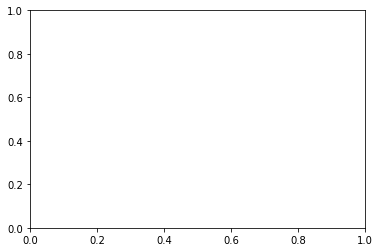

In [186]:
plt.scatter(x_train,y_train, color='red')
plt.plot(x_train, regressor.predict(x_train),color='blue') #regressor is taking the value with training and predicted training
#not with the test
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel('salary')
plt.show()

In [156]:
# from sklearn.decomposition import PCA as p
# ppp = p(n_components=1)
# x_train = ppp.fit_transform(x_train)
# x_test = ppp.transform(x_test)
# l.predict(x_train).shape

In [155]:
# plt.scatter(x_train,y_train)
# plt.plot(x_train,l.predict(x_train),color = 'red')
# plt.show()


## 11 Develop a Logistic Regression model and apply PCA for the given data set and find the accuracy of the model

In [196]:
df=pd.read_csv('Social_Network_Ads.csv')
x=df.iloc[:,2:4]

y=df.iloc[:,-1]

In [197]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)


In [201]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

In [208]:
from sklearn.decomposition import PCA
p= PCA(n_components=1)
x_train = p.fit_transform(x_train)
x_test = p.transform(x_test)


In [209]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [210]:
pred = lr.predict(x_test)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [211]:
from sklearn.metrics import confusion_matrix as c 
cm = c(y_test,pred)
cm


array([[68,  0],
       [24,  8]], dtype=int64)

In [212]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,pred))

0.76


# Develop a random forest for the given data set and find the accuracy of the model.

In [214]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [215]:
x=df.iloc[:,2:4]

y=df.iloc[:,-1]

In [216]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)


In [217]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

In [218]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=5,max_features=2)
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=2, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [222]:
pred = rf.predict(x_test)
pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

In [220]:
from sklearn.metrics import confusion_matrix as c 
cm = c(y_test,pred)
cm


array([[62,  6],
       [ 4, 28]], dtype=int64)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,pred))

## Entropy calculation

In [223]:
import pandas as pd
import numpy as np

In [224]:
df=pd.read_csv('play.csv')
df

,DAY,Outlook,Temperature,Humidity,Wind,PlayTennis
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cold,Normal,Weak,Yes
5,D6,Rain,Cold,Normal,Strong,No
6,D7,Overcast,Cold,Normal,Strong,Yes
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cold,Normal,Weak,Yes
9,D10,Rain,Mild,Normal,Weak,Yes


In [226]:

# def entropy(target_col):
#     elements,counts = np.unique(target_col,return_counts =True)
#     for i in range(len(elements)):
#         entropy = np.sum([-(counts[i]/np.sum(counts))*np.log2(counts[i]/np.sum(counts))])
#     return entropy

def entropy(target_col):
    elements,counts = np.unique(target_col,return_counts = True)
#     print(elements)
#     print(counts)
    arr_val = []
    for i in range(len(elements)):
        mult = counts[i]/np.sum(counts)
        log_val = np.log2(mult)
        arr_val.append(mult*log_val)
    return -1* np.sum(arr_val)

#     entropy = np.sum([(-counts[i]/np.sum(counts))*np.log2(counts[i]/np.sum(counts)) for i in range(len(elements))])
#     return entropy
# def InfoGain(data,split_attribute_name,target_name):
#     #Calculate the entropy of the total dataset
#     total_entropy = entropy(data[target_name])
    
#     ##Calculate the entropy of the dataset
#     #Calculate the values and the corresponding counts for the split attribute
#     vals,counts= np.unique(data[split_attribute_name],return_counts=True)
    
#     #Calculate the weighted entropy
#     for i in range(len(vals)):
#         Weighted_Entropy = np.sum([(counts[i]/np.sum(counts))*entropy(data.where(data[split_attribute_name]==vals[i]).dropna()[target_name])])
    
#     #Calculate the information gain
#     Information_Gain = total_entropy - Weighted_Entropy
#     return Information_Gain

def InfoGain(data,split_attribute_name,target_name):
    #Calculate the entropy of the total dataset
    total_entropy = entropy(data[target_name])
   
    ##Calculate the entropy of the dataset
    #Calculate the values and the corresponding counts for the split attribute
    vals,counts= np.unique(data[split_attribute_name],return_counts=True)
   
    #Calculate the weighted entropy
   
    sum_weights = []
    for i in range(len(vals)):
        mul = counts[i]/np.sum(counts)
        arr_val = data.where(data[split_attribute_name]==vals[i]).dropna()[target_name]
        sum_weights.append(mul*entropy(arr_val))
       
    Weighted_Entropy = np.sum(sum_weights)
    #Calculate the information gain
    Information_Gain = total_entropy - Weighted_Entropy
    return Information_Gain

In [234]:
print(InfoGain(df,'Outlook','PlayTennis'))
print(entropy(df['Outlook']))

0.24674981977443933
1.5774062828523454


In [237]:
import numpy as np
import math
a=[2,3]
b=[4,5]
f=math.sqrt(sum([(a-b)**2 for a,b in zip(a,b)]))
print("ED is :",f)
    

ED is : 2.8284271247461903


# Write the Python code to calculate covariance matrix, Eigen values and Eigen vectors

In [238]:


x=np.array([11,5,4,9,9,6])
y=np.array([2,14,3,2,1,6])

x1=x.mean()
y1=y.mean()

cov= np.sum((x-x1)*(y-y1))

covx = np.sum((x-x1)**2)

covy = np.sum((y-y1)**2)
covxy = np.zeros([2,2])
covxy
covxy[0,0]=covx
covxy[0,1]=cov
covxy[1,0]=cov
covxy[1,1]=covy

w,v=np.linalg.eig(covxy/(len(x)-1))
w
v

array([[-0.93017808,  0.36710861],
       [-0.36710861, -0.93017808]])

# Write the Python code to calculate the following
# a. Accuracy 
# b. Misclassification
# c. Type-1 and Type-2 error rates
# d. Sensitivity
# e. Specificity

In [239]:
cm

array([[62,  6],
       [ 4, 28]], dtype=int64)

In [241]:
tp=cm[0,0]
tn=cm[1,1]
fp=cm[1,0]
fn=cm[0,1]

In [244]:
acc=tp/(tp+fp+tn+fn)
print("Accuracy:",acc)

Accuracy: 0.62


In [245]:
mis=1-acc
print("Misclassification:",mis)

Misclassification: 0.38


In [252]:
ty2=tn/(tn+fp)
print("type 2:",ty2)

type 2: 0.875


In [251]:
ty1=fp/(tn+fp)
print("type 1:",ty1)

type 1: 0.125


In [249]:
sen=tp/(fn+tp)

Sensitivity: 0.9117647058823529



print("Specificity:",spe)

In [253]:
#1.	Obtain the hypothesis space search by Find-S for the given training examples.
sky=['sunny','sunny','rainy','sunny']
airtemp=['warm','warm','cold','warm']
hum=['normal','high','high','high']
wind=['strong','strong','strong','strong']
water=['warm','warm','warm','cool']
fc=['same','same','change','change']
esport=['yes','yes','no','yes']

In [254]:
data={"Sky":sky,"Airtemp":airtemp,'Humidity':hum,'Wind':wind,'Water':water,'Forecast':fc,'Enjoysport':esport}

In [255]:
import numpy as np
import pandas as pd

In [256]:
df=pd.DataFrame(data)

In [258]:
df.to_csv('sport.csv')
df

,Sky,Airtemp,Humidity,Wind,Water,Forecast,Enjoysport
0,sunny,warm,normal,strong,warm,same,yes
1,sunny,warm,high,strong,warm,same,yes
2,rainy,cold,high,strong,warm,change,no
3,sunny,warm,high,strong,cool,change,yes


In [259]:
#initial value of hypothesis
h=['0']*6
for instance in df.values:
    if instance[-1]=='yes':
        for j in range(len(h)):
            if (h[j]=='0' or h[j]==instance[j]):
                h[j]=instance[j]
            elif h[j]!=instance[j]:
                h[j]='?'
print("the maximally hypothesis  is:",h)

the maximally hypothesis  is: ['sunny', 'warm', '?', 'strong', '?', '?']


In [260]:
import csv
with open('sport.csv')  as csvFile:
        examples = [tuple(line[1:]) for line in csv.reader(csvFile)]
examples=examples[1:]

In [261]:

def g_0(n):
    return ("?",)*n

def s_0(n):
    return ('0',)*n


In [262]:
def more_general(h1, h2):
    more_general_parts = []
    for x, y in zip(h1, h2):
        mg = x == "?" or (x != "0" and (x == y or y == "0"))
        more_general_parts.append(mg)
    return all(more_general_parts)
        

In [263]:
def fulfills(example, hypothesis):
    ### the implementation is the same as for hypotheses:
    return more_general(hypothesis, example)

def min_generalizations(h, x):
    h_new = list(h)
    for i in range(len(h)):
        if not fulfills(x[i:i+1], h[i:i+1]):
            h_new[i] = '?' if h[i] != '0' else x[i]
    return [tuple(h_new)]

In [264]:
def min_specializations(h, domains, x):
    results = []
    for i in range(len(h)):
        if h[i] == "?":
            for val in domains[i]:
                if x[i] != val:
                    h_new = h[:i] + (val,) + h[i+1:]
                    results.append(h_new)
        elif h[i] != "0":
            h_new = h[:i] + ('0',) + h[i+1:]
            results.append(h_new)
    return results

In [265]:
def get_domains(examples):
    d = [set() for i in examples[0]]
    for x in examples:
        for i, xi in enumerate(x):
            d[i].add(xi)
    return [list(sorted(x)) for x in d]

In [266]:
def generalize_S(x, G, S):
    S_prev = set(S)
    for s in S_prev:
        if s not in S:
            continue
        if not fulfills(x, s):
            S.remove(s)
            Splus = min_generalizations(s, x)
            ## keep only generalizations that have a counterpart in G
            S.update([h for h in Splus if any([more_general(g,h) 
                                               for g in G])])
            ## remove hypotheses less specific than any other in S
            S.difference_update([h for h in S if 
                                 any([more_general(h, h1) 
                                      for h1 in S if h != h1])])
    return S

In [267]:
def specialize_G(x, domains, G, S):
    G_prev = list(G)
    for g in G_prev:
        if g not in G:
            continue
        if fulfills(x, g):
            G.remove(g)
            Gminus = min_specializations(g, domains, x)
            ## keep only specializations that have a conuterpart in S
            G.update([h for h in Gminus if any([more_general(h, s)
                                                for s in S])])
            ## remove hypotheses less general than any other in G
            G.difference_update([h for h in G if 
                                 any([more_general(g1, h) 
                                      for g1 in G if h != g1])])
    return G

In [268]:
def candidate_elimination(examples):
    domains = get_domains(examples)[:-1]
    
    G = set([g_0(len(domains)-1)])
    S = set([s_0(len(domains)-1)])
    i=0
    print("\n G[{0}]:".format(i),G)
    print("\n S[{0}]:".format(i),S)
    for xcx in examples:
        i=i+1
        x, cx = xcx[:-1], xcx[-1]  # Splitting data into attributes and decisions
        if cx=='yes': # x is positive example
            G = {g for g in G if fulfills(x, g)}
            S = generalize_S(x, G, S)
        else: # x is negative example
            S = {s for s in S if not fulfills(x, s)}
            G = specialize_G(x, domains, G, S)
        print("\n G[{0}]:".format(i),G)
        print("\n S[{0}]:".format(i),S)
    return

In [269]:
candidate_elimination(examples)


 G[0]: {('?', '?', '?', '?', '?')}

 S[0]: {('0', '0', '0', '0', '0')}

 G[1]: {('?', '?', '?', '?', '?')}

 S[1]: {('sunny', 'warm', 'normal', 'strong', 'warm')}

 G[2]: {('?', '?', '?', '?', '?')}

 S[2]: {('sunny', 'warm', '?', 'strong', 'warm')}

 G[3]: {('?', 'warm', '?', '?', '?'), ('sunny', '?', '?', '?', '?')}

 S[3]: {('sunny', 'warm', '?', 'strong', 'warm')}

 G[4]: {('?', 'warm', '?', '?', '?'), ('sunny', '?', '?', '?', '?')}

 S[4]: {('sunny', 'warm', '?', 'strong', '?')}
